In [70]:
library(factoextra)


In [2]:
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}


# 2 dimensional Data

In [3]:
set.seed (2)
x=matrix (rnorm (50*2) , ncol =2)

In [4]:
head(x)

-0.89691455,-0.8382871
0.18484918,2.0663014
1.58784533,-0.5622471
-1.13037567,1.2757155
-0.08025176,-1.0475726
0.13242028,-1.9658782


In [5]:
# add 3 to first 25 rows only those are in 1st column
x[1:25 ,1]=x[1:25 ,1]+3

In [6]:
head(x)

2.103085,-0.8382871
3.184849,2.0663014
4.587845,-0.5622471
1.869624,1.2757155
2.919748,-1.0475726
3.132420,-1.9658782


In [7]:
# subtract 4 from first 25 rows only those are in 2nd column
x[1:25 ,2]=x[1:25 ,2] -4

In [8]:
head(x)

2.103085,-4.838287
3.184849,-1.933699
4.587845,-4.562247
1.869624,-2.724284
2.919748,-5.047573
3.132420,-5.965878


# Keamn cluster: 2

In [9]:
# number of cluster 2
# kmeans(dataset, number of cluster (center), nstart (if centers is a number, how many random sets should be chosen?))
km.out =kmeans (x,2, iter.max=10, nstart =20)


In [10]:
# Print the results
print(km.out)

K-means clustering with 2 clusters of sizes 25, 25

Cluster means:
        [,1]       [,2]
1  3.3339737 -4.0761910
2 -0.1956978 -0.1848774

Clustering vector:
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

Within cluster sum of squares by cluster:
[1] 63.20595 65.40068
 (between_SS / total_SS =  72.8 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      


In [11]:
# kmeans returns an object of class "kmeans" which has a print and a fitted method

# cluster - A vector of integers (from 1:k) indicating the cluster to which each point is allocated.
km.out$cluster

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

In [12]:
km.out$centers

3.3339737,-4.0761910
-0.1956978,-0.1848774


In [13]:
km.out$size

[1] 25 25

In [14]:
km.out$tot.withinss

[1] 128.6066

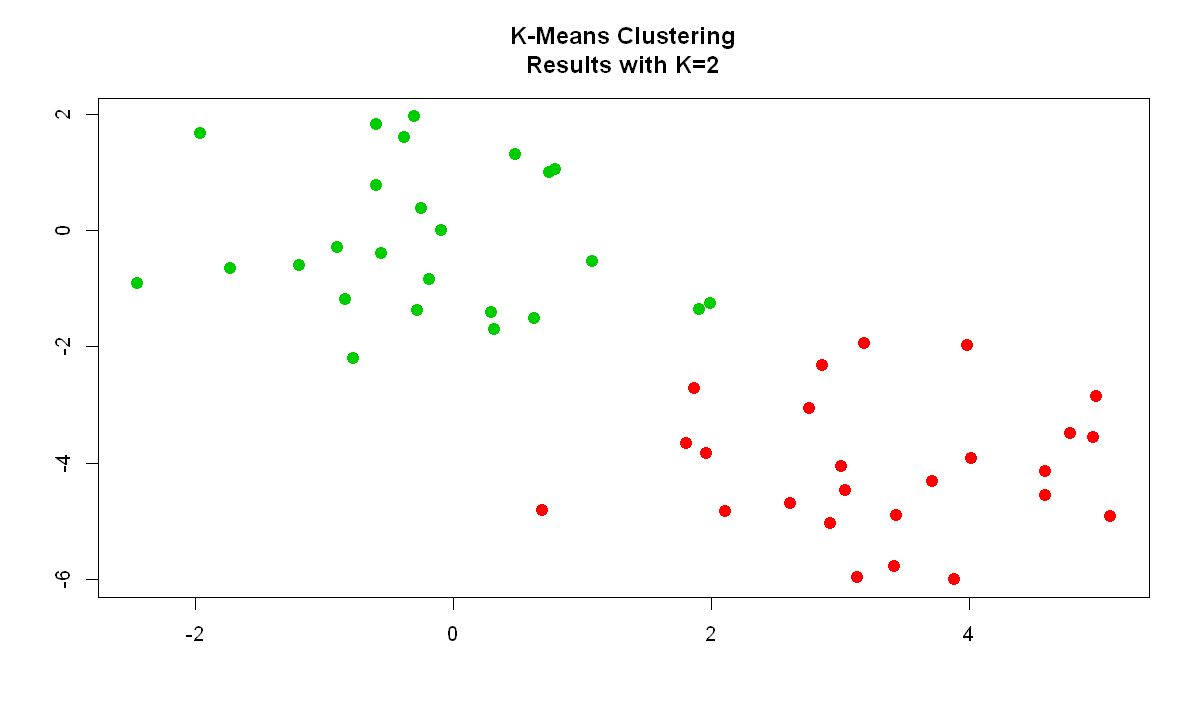

In [15]:
fig(10, 6)
plot(x, col =(km.out$cluster +1) , main="K-Means Clustering
Results with K=2", xlab ="", ylab="", pch =20, cex =2)

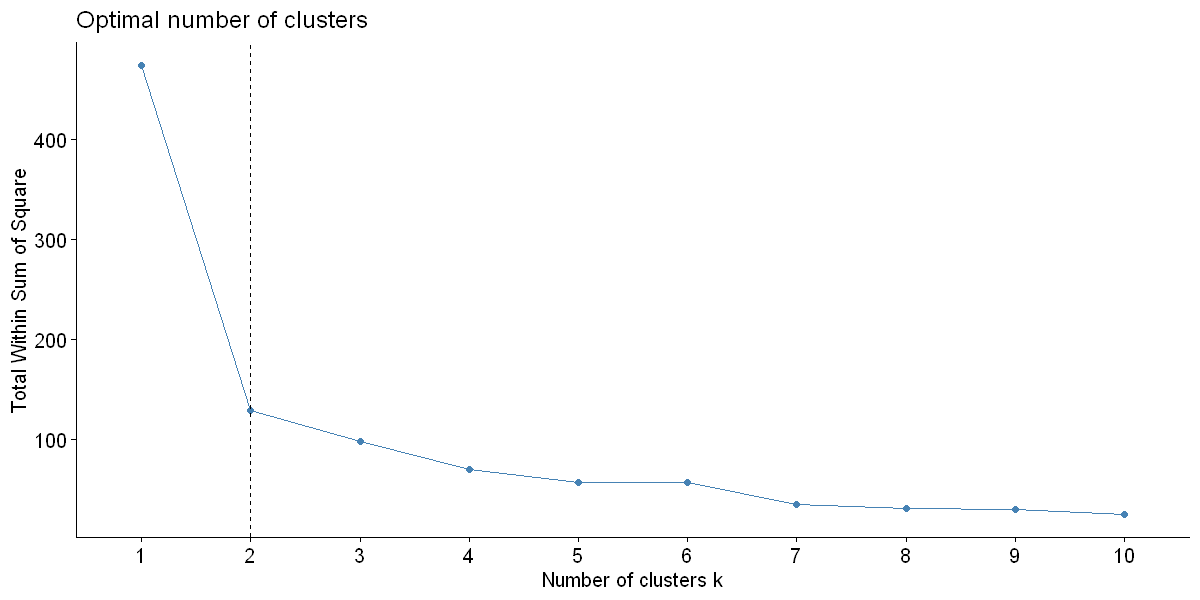

In [16]:
# Elbow method for kmeans
fig(10, 5)
fviz_nbclust(x, kmeans, method = "wss") + geom_vline(xintercept = 2, linetype = 2)

In [17]:
# cbind() function in R Language is used to combine specified Vector, Matrix or Data Frame by columns
dd <- cbind(x, cluster = km.out$cluster)
head(dd)

,,cluster
2.103085,-4.838287,1
3.184849,-1.933699,1
4.587845,-4.562247,1
1.869624,-2.724284,1
2.919748,-5.047573,1
3.132420,-5.965878,1


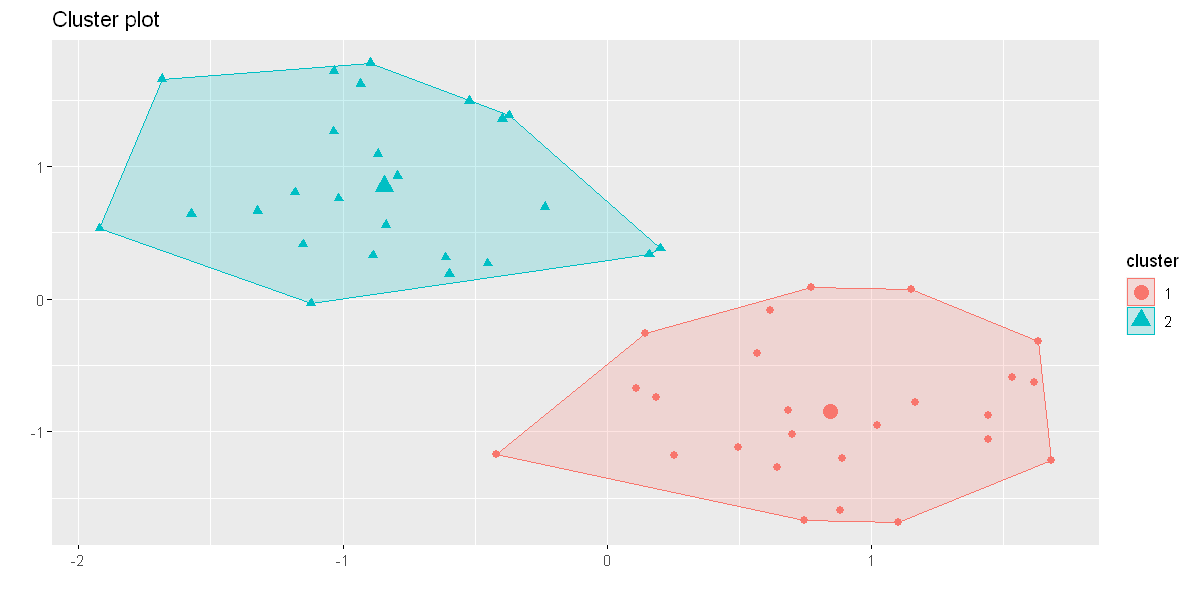

In [18]:
# Show points only
# fviz_cluster(km.out,dd[,-3], geom = "point" ,palette = "Set1", ggtheme = theme_minimal(),ellipse.type = "norm")
fviz_cluster(km.out,dd[,-3], geom = "point", show.clust.cent=TRUE, pointsize=2)

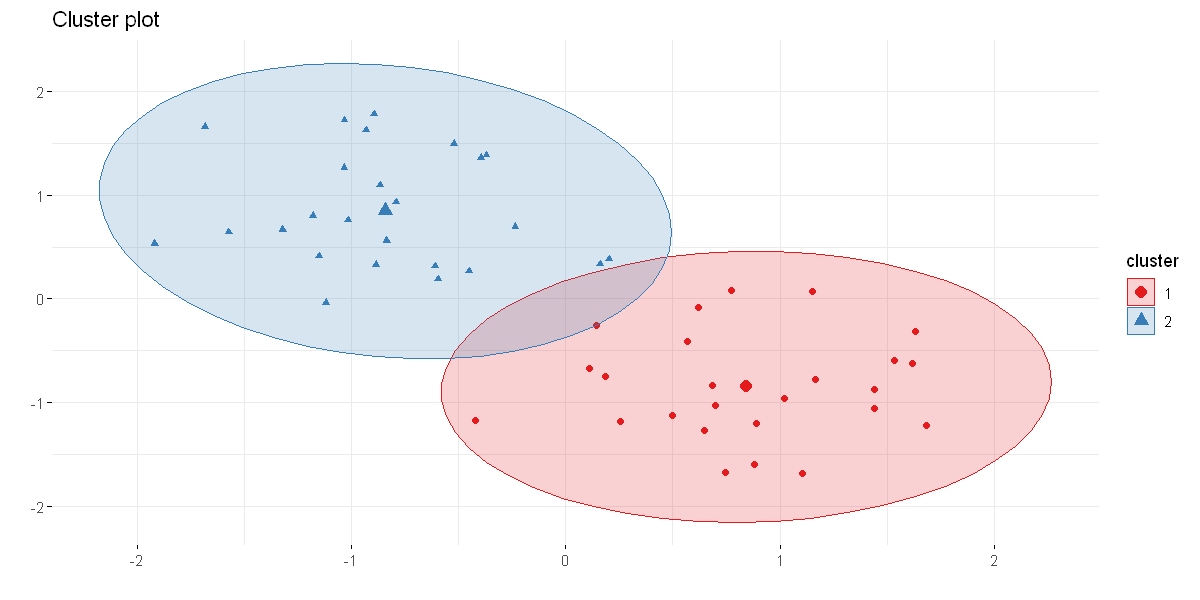

In [19]:
fviz_cluster(km.out,dd[,-3], geom = "point" ,palette = "Set1", ggtheme = theme_minimal(),ellipse.type = "norm")


# Keamns cluster: 3

In [20]:
km3.out =kmeans (x,3, nstart =20)

In [21]:
print(km3.out)

K-means clustering with 3 clusters of sizes 10, 17, 23

Cluster means:
        [,1]        [,2]
1  2.3001545 -2.69622023
2  3.7789567 -4.56200798
3 -0.3820397 -0.08740753

Clustering vector:
 [1] 2 1 2 1 2 2 2 1 2 1 2 1 2 1 2 1 2 2 2 2 2 1 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3
[39] 3 3 3 3 3 1 3 1 3 3 3 3

Within cluster sum of squares by cluster:
[1] 19.56137 25.74089 52.67700
 (between_SS / total_SS =  79.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      


In [22]:
km3.out$tot.withinss

[1] 97.97927

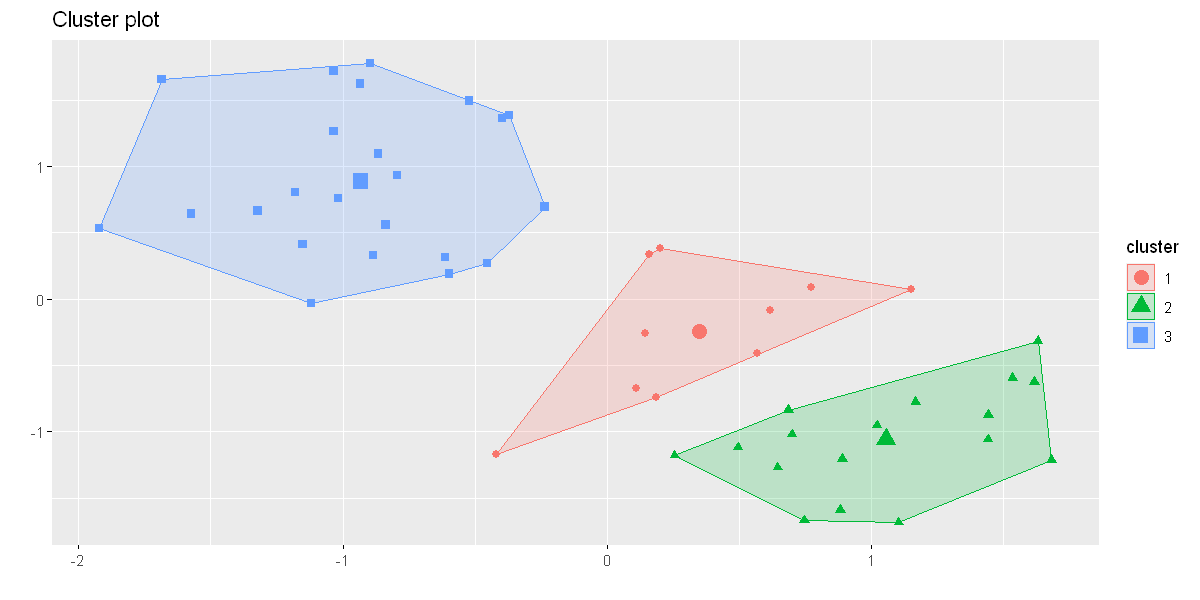

In [23]:
# Show points only
dd3 <- cbind(x, cluster = km3.out$cluster)
fviz_cluster(km3.out,dd3[,-3], geom = "point", show.clust.cent=TRUE, pointsize=2)

# Hierarchical Clustering

In [62]:
# stand = TRUE meaning the data will be standardized using the function scale()
res <- hcut(x, k = 4, hc_func="hclust", stand = TRUE, hc_method="complete")

print(res)


Call:
stats::hclust(d = x, method = hc_method)

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 50 



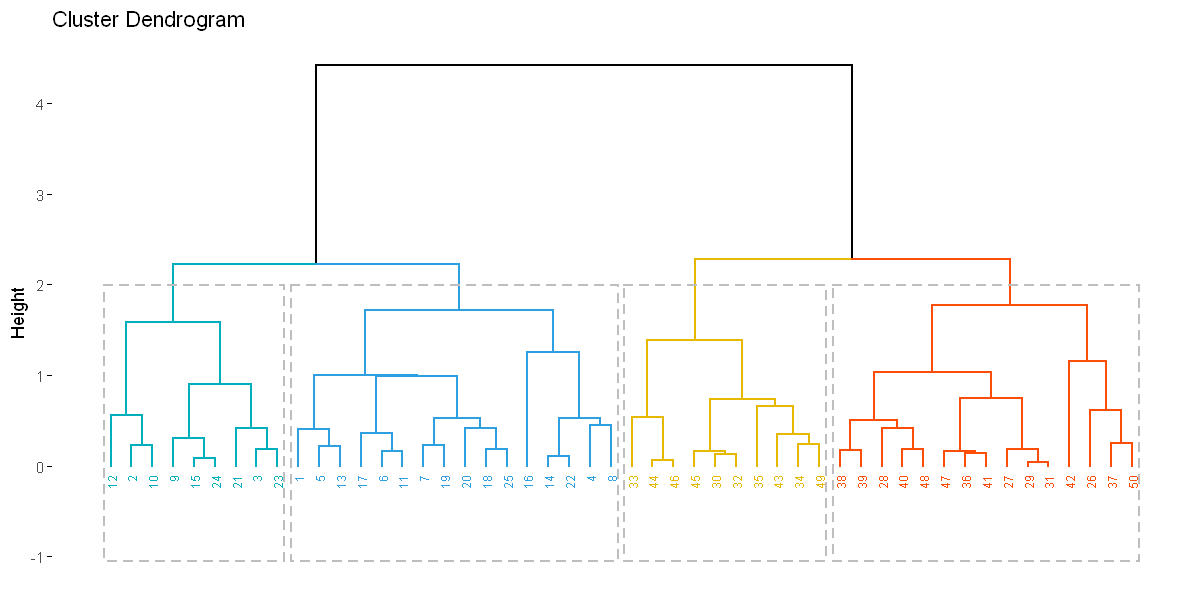

In [64]:
fviz_dend(res, rect = TRUE, cex = 0.5, k_colors = c("#00AFBB","#2E9FDF", "#E7B800", "#FC4E07"))

In [57]:
# Cluster assignements of observations
res$cluster
# Size of
res$size

[1] 1 2 2 1 1 1 1 1 2 2 1 2 1 1 2 1 1 1 1 1 2 1 2 2 1 3 3 3 3 4 3 4 4 4 4 3 3 3
[39] 3 3 3 3 4 4 4 4 3 3 4 3

[1] 16  9 15 10

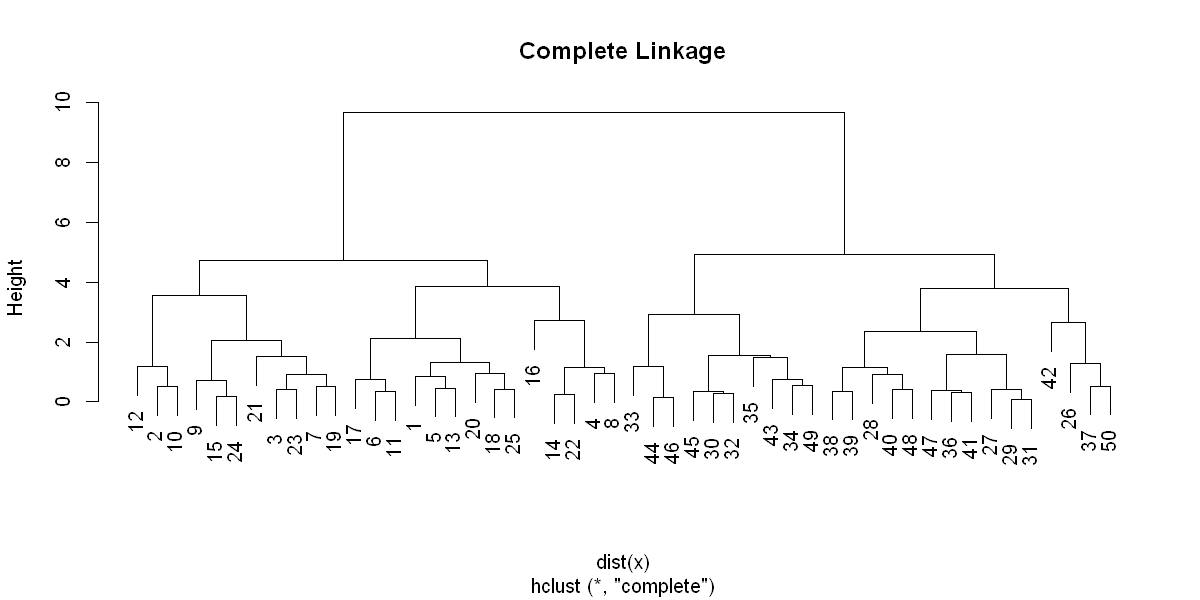

In [68]:
# linkage =  complete
# dist() compute the 50 × 50 inter-observation Euclidean distance matrix
hc.complete = hclust (dist(x), method ="complete")
plot(hc.complete ,main ="Complete Linkage")


In [27]:
hc.average =hclust (dist(x), method ="average")
hc.single =hclust (dist(x), method ="single")

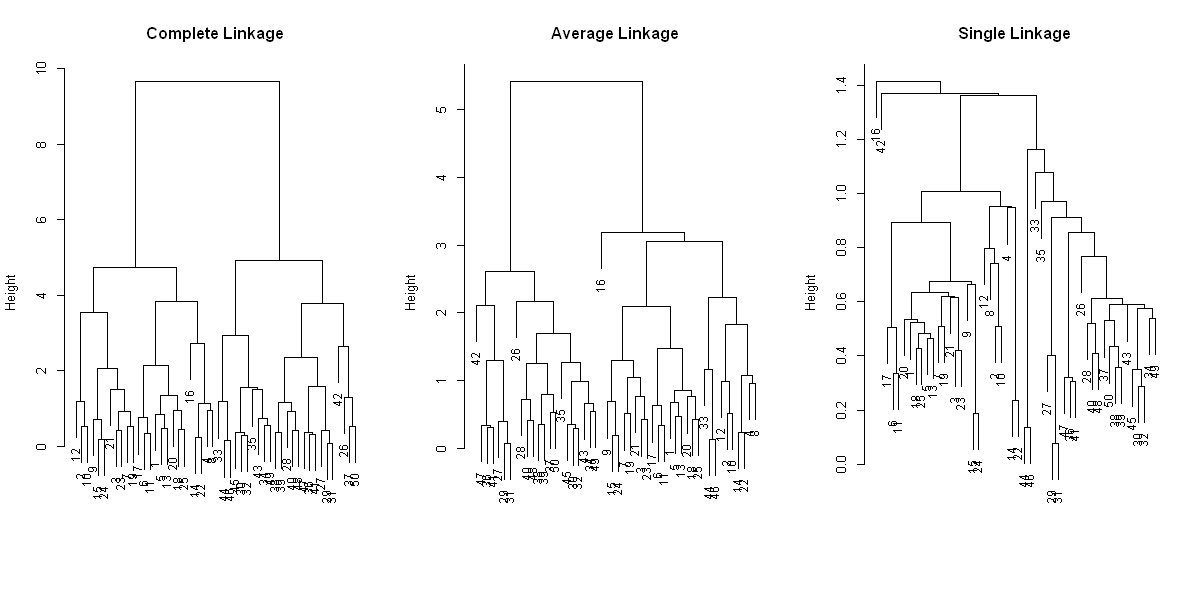

In [28]:
fig(10, 5)
par(mfrow =c(1,3))
plot(hc.complete ,main ="Complete Linkage", xlab="", sub ="", cex =.9)
plot(hc.average , main ="Average Linkage", xlab="", sub ="", cex =.9)
plot(hc.single , main ="Single Linkage", xlab="", sub ="", cex =.9)

In [29]:
# To determine the cluster labels for each observation associated with a
# given cut of the dendrogram, we can use the cutree() function
cutree (hc.complete , 2)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

In [30]:
cutree (hc.average , 2)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2
[39] 2 2 2 2 2 1 2 1 2 2 2 2

In [33]:
# one point belongs to one cluster
cutree (hc.single , 2)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1

In [34]:
cutree (hc.single , 4)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3
[39] 3 3 3 4 3 3 3 3 3 3 3 3

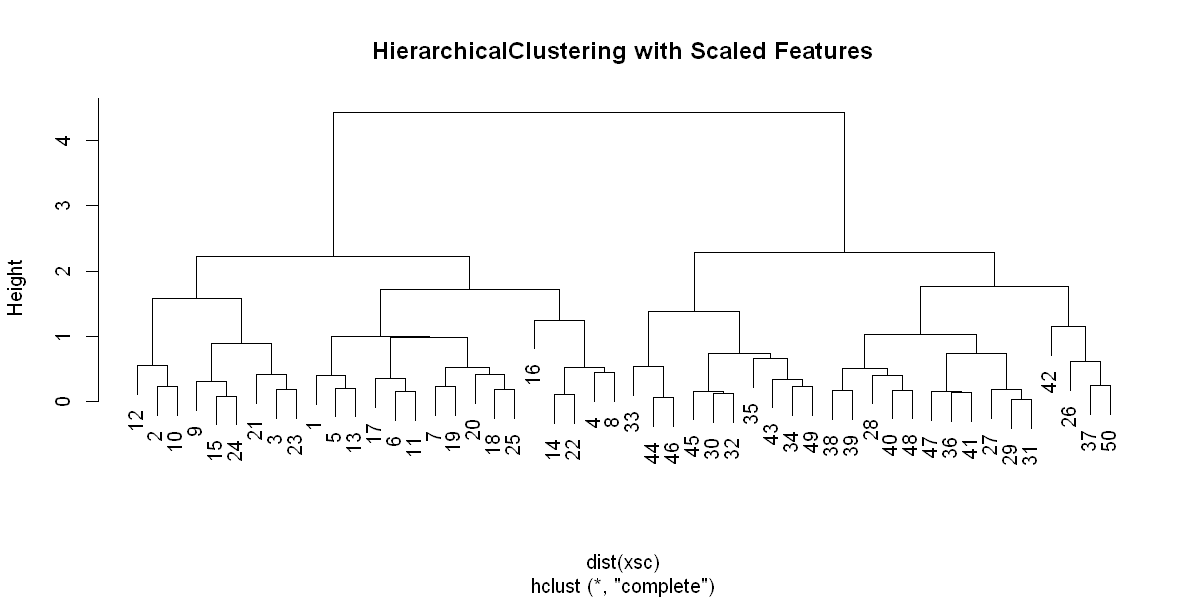

In [35]:
# scale() scale the variables
xsc=scale (x)
plot(hclust (dist(xsc), method ="complete"), main ="HierarchicalClustering with Scaled Features")

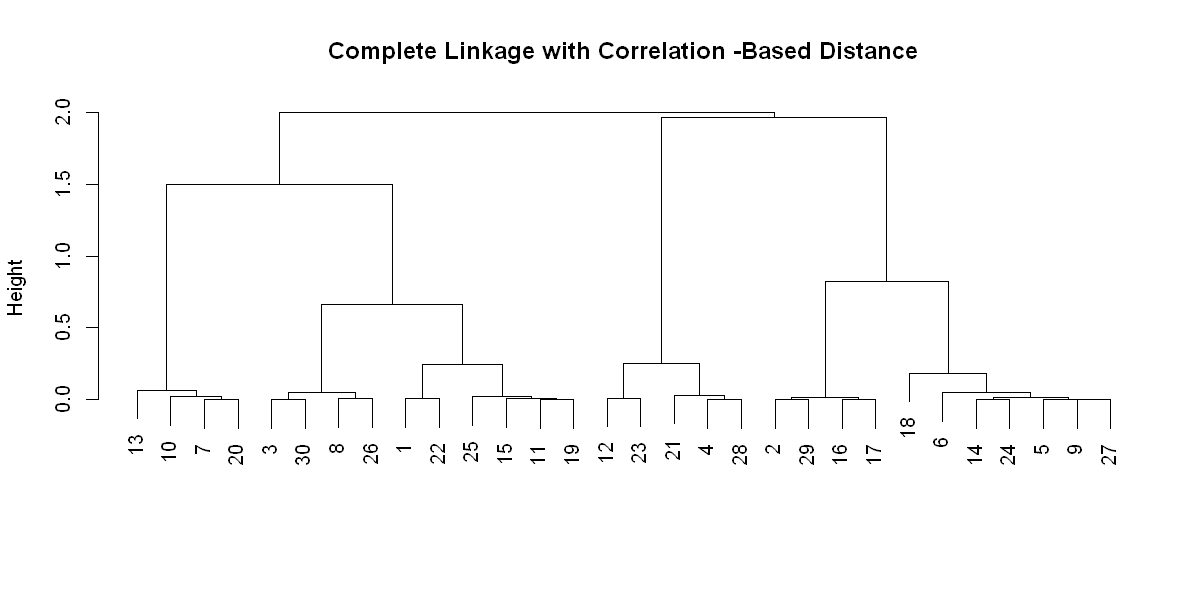

In [41]:
# Correlation-based distance
# as.dist() to computer correlation-based distance
# 

x3=matrix (rnorm (30*3) , ncol =3)
dd=as.dist(1- cor(t(x3)))
hc3.complete = hclust (dd, method ="complete")
plot(hc3.complete, main="Complete Linkage with Correlation -Based Distance", xlab="", sub ="")